In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [44]:
# USER VARS

# please put every absolute path of your result directories (the one with a date as title)
RESULT_DIRECTORY_LIST = [
    "C:\\Users\\Bacon\\OneDrive\\Bureau\\RTM\\evofond\\evofond_v1-main\\projects\\tuto\\results\\2022_9_6_8_50_48",
    "C:\\Users\\Bacon\\OneDrive\\Bureau\\RTM\\evofond\\evofond_v1-main\\projects\\tuto\\results\\2022_9_6_9_3_47"
]

In [45]:
# CHECK PATH LIST
for path in RESULT_DIRECTORY_LIST:
    if not(os.path.isdir(path)):
        print(f"this directory was not found, please check it : \n {path}")
        
print("All the directories have been found.")

All the directories have been found.


In [90]:
def parse_txt_file(path):
    datas = []
    with open(path, 'r') as f:
        lines = f.readlines()
        datas = [[] for _ in lines[0].split()]
        for i in range(1, len(lines)):
            for i, d in enumerate(lines[i].split()):
                datas[i].append(float(d))
    return datas

def compare_2_final_profile(index1=0, index2=1):
    fig, axs = plt.subplots(2)
    z_matrix_1 = np.load(RESULT_DIRECTORY_LIST[index1]+"\\np_files\\z_matrix.npy")
    z_matrix_2 = np.load(RESULT_DIRECTORY_LIST[index2]+"\\np_files\\z_matrix.npy")
    x_list_1 = np.load(RESULT_DIRECTORY_LIST[index1]+"\\np_files\\x_list.npy")
    x_list_2 = np.load(RESULT_DIRECTORY_LIST[index2]+"\\np_files\\x_list.npy")
    axs[0].plot(x_list_1, z_matrix_1[0], label="intial profile")
    axs[0].plot(x_list_1, z_matrix_1[-1], label="final profile 1")
    axs[0].plot(x_list_2, z_matrix_2[-1], label="final profile 2", linestyle="dashed")
    axs[0].legend()
    axs[0].set_ylabel("difference of height (m)")
    axs[1].plot(x_list_1, z_matrix_1[-1]-z_matrix_2[-1], label="difference of bottom height")
    axs[1].set_xlabel("abscissa (m)")
    axs[1].legend()
    fig.suptitle("final profiles comparison")
    
def compare_2_max_profile(index1=0, index2=1):
    fig, axs = plt.subplots(2)
    z_matrix_1 = np.load(RESULT_DIRECTORY_LIST[index1]+"\\np_files\\z_matrix.npy")
    x_list_1 = np.load(RESULT_DIRECTORY_LIST[index1]+"\\np_files\\x_list.npy")

    datas = parse_txt_file(RESULT_DIRECTORY_LIST[0]+"\\txt_files\\zmax.txt")
    x_list_1 = datas[0]
    z_list_1 = datas[1]
    datas = parse_txt_file(RESULT_DIRECTORY_LIST[1]+"\\txt_files\\zmax.txt")
    x_list_2 = datas[0]
    z_list_2 = datas[1]
    axs[0].plot(x_list_1, z_matrix_1[0], label="intial profile")
    axs[0].plot(x_list_1, z_list_1, label="maximum profile 1")
    axs[0].plot(x_list_2, z_list_2, label="maximum profile 2", linestyle="dashed")
    axs[0].legend()
    axs[0].set_ylabel("difference of height (m)")
    axs[1].plot(x_list_1, np.array(z_list_1)-np.array(z_list_2), label="difference of bottom height (1-2)")
    axs[1].set_xlabel("abscissa (m)")
    axs[1].legend()
    fig.suptitle("max profiles comparison")


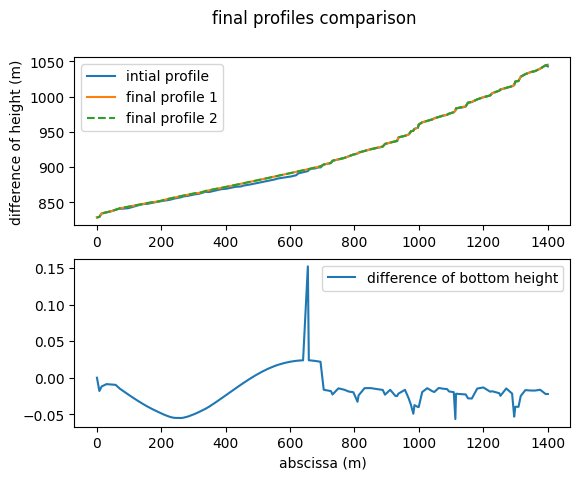

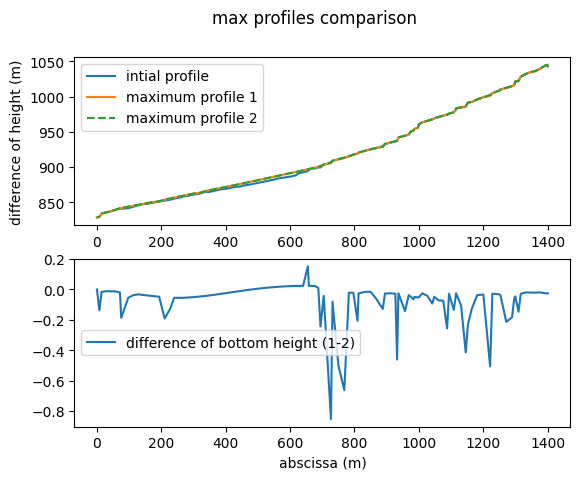

In [91]:
compare_2_final_profile()
compare_2_max_profile()
